# Projet Finance

# Description du projet

    Qui est le plus susceptible d'avoir un compte bancaire ?
L'inclusion financière reste l'un des principaux obstacles au développement économique et humain en
Afrique. 
Par exemple, au Kenya, au Rwanda, en Tanzanie et en Ouganda, seuls 9,1 millions d'adultes (soit 13,9 % de la population adulte) ont accès à un compte bancaire commercial ou l'utilisent.
Traditionnellement, l'accès à un compte bancaire est considéré comme un indicateur d'inclusion financière.

Malgré la prolifération de l'argent mobile en Afrique, et la croissance des technologies innovantes de fin
les banques continuent de jouer un rôle essentiel pour faciliter l'accès aux services financiers.

L'accès à la banque permettent aux ménages d'épargner et de faciliter les paiements tout en aidant les entreprises à améliorer leur solvabilité et leur accès à d'autres services financiers. 
Par conséquent, l'accès aux comptes bancaires est un facteur essentiel de la croissance économique à long terme.

Énoncé du problème

Il s'agit d'un problème de classification de l'apprentissage automatique supervisé. 
est de créer un modèle d'apprentissage automatique pour prédire quels sont les individus les plus susceptibles avoir ou utiliser un compte bancaire. 

0 - Absence de Compte Bancaire

1 - Possède un Compte Bancaire

Les modèles et solutions développés peuvent fournir une indication de l'état de l'inclusion financière au Kenya, au Rwanda, en Tanzanie et en Ouganda, tout en donnant un aperçu certains des principaux facteurs démographiques susceptibles de déterminer les résultats financiers des individus.

Dans ce projet, nous utilisonsons python3 et le notebook Jupyter.  
Nous allons parcourir le projet en important l'ensemble de données, en effectuant une analyse exploratoire des données pour obtenir des informations et comprendre à quoi ressemble l'ensemble de données, puis construire le modèle. 

Nous procéderons en 7 étapes pour l'apprentissage automatique supervisé;

    Collecte de données
    Préparation des données
    Choisir un modèle
    Entraîner le modèle
    Évaluer le modèle
    Réglage des paramètres
    Faire des prédictions

- [I - Analyses univariées](#I)
- [II - Analyses Bivariées](#I)

In [1]:
# Nous importons les bibliothèques nécessaires pour lire le jeu de données 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
# importer la base de données
df = pd.read_csv('Train_v2 (1).csv')
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [3]:
# importer la base de données
Test = pd.read_csv('Test_v2.csv')
Test

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
...,...,...,...,...,...,...,...,...,...,...,...,...
10081,Uganda,2018,uniqueid_2998,Rural,No,2,62,Female,Spouse,Married/Living together,Primary education,Self employed
10082,Uganda,2018,uniqueid_2999,Urban,Yes,8,42,Male,Head of Household,Married/Living together,Primary education,Self employed
10083,Uganda,2018,uniqueid_3000,Urban,Yes,1,39,Male,Head of Household,Single/Never Married,Secondary education,Other Income
10084,Uganda,2018,uniqueid_3001,Rural,Yes,6,28,Female,Spouse,Married/Living together,Primary education,Self employed


In [4]:
df.shape

(23524, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [6]:
df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [7]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [8]:
#on verifie les valeurs nulls
df.isna().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [9]:
df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [10]:
df.describe(include='all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_249,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [11]:
df

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed


In [12]:
#enaming the column names
df = df.rename(columns={'age_of_respondent' : 'age', 'gender_of_respondent': 'gender' })
df.head(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age,gender,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [13]:
#Quelles valeurs uniques y a-t-il dans chaque entrée de colonne de l'ensemble de données ?
for i in df.columns:
 print(df[i].unique())
 print ("\n")

['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


[2018 2016 2017]


['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']


['Yes' 'No']


['Rural' 'Urban']


['Yes' 'No']


[ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]


[ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]


['Female' 'Male']


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA']


['Self employed' 'Government

In [14]:
#Lignes contenant des données en double
duplicate_rows_df = df[df.duplicated()]
print("nombre de lignes en double:", duplicate_rows_df.shape)

nombre de lignes en double: (0, 13)


In [15]:
# Utilisé pour compter le nombre de lignes avant de supprimer les données
df.count() 

country                   23524
year                      23524
uniqueid                  23524
bank_account              23524
location_type             23524
cellphone_access          23524
household_size            23524
age                       23524
gender                    23524
relationship_with_head    23524
marital_status            23524
education_level           23524
job_type                  23524
dtype: int64

In [16]:
# Changement des différentes colonnes en numérique
float_array = train_data[[ 'location_type', 'bank_account', 'cellphone_access', 'gender']].values.astype(float)

NameError: name 'train_data' is not defined

In [17]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [18]:
# création d'un dataframe contenant uniquement les valeurs numériques
df_int = df.select_dtypes(include = ['float64', 'int64'])
df_int.head()

,year,household_size,age
0,2018,3,24
1,2018,5,70
2,2018,5,26
3,2018,5,34
4,2018,8,26


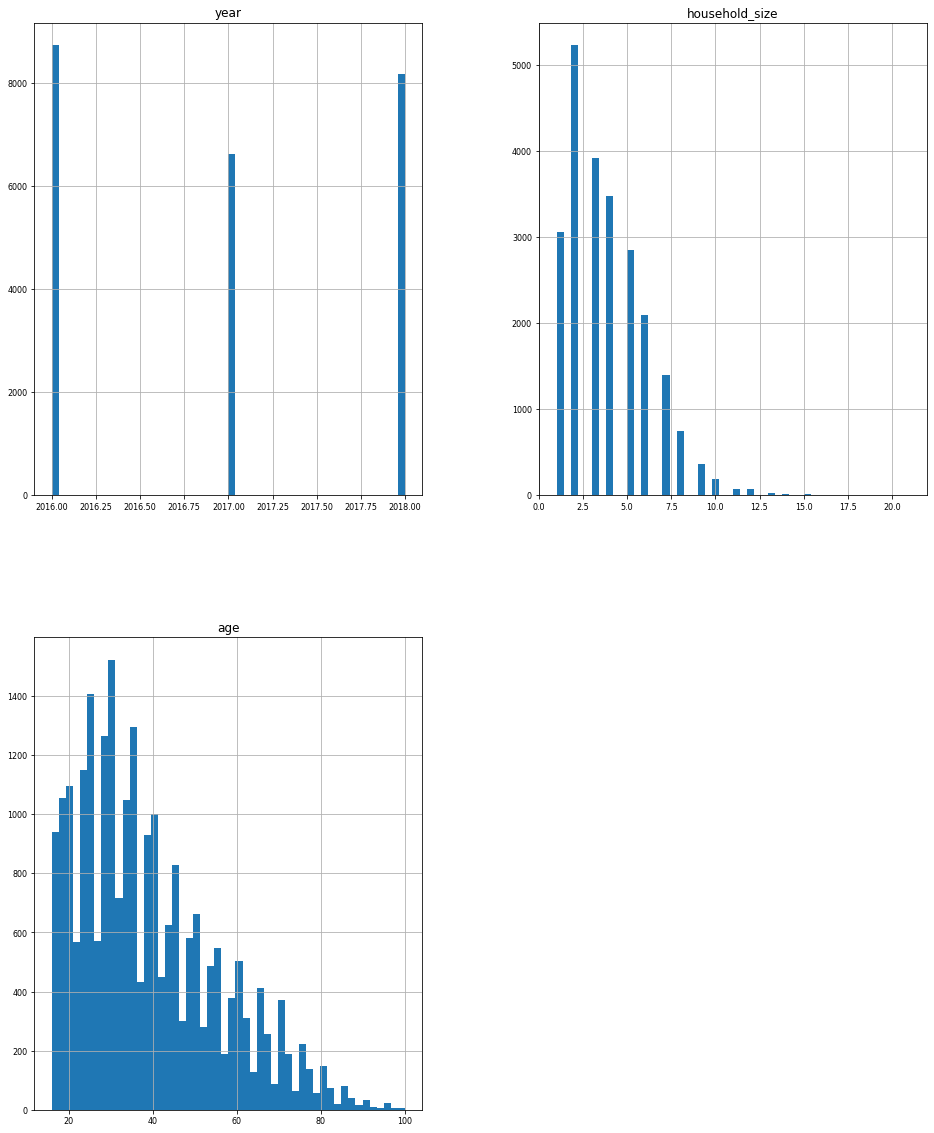

In [19]:
#Visualisation des variables numériques
df_int.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); 

# - [I - Analyses univariées](#I)

In [20]:
columns = ['country', 'bank_account',  'location_type',  'cellphone_access', 'household_size']
def viz(df):
    for col in df[columns]:   
        
        fig = plt.figure()
        fig.suptitle('Visualisation et analyse de la colonne ', fontsize=14, fontweight='bold')
        sns.countplot(df[col])

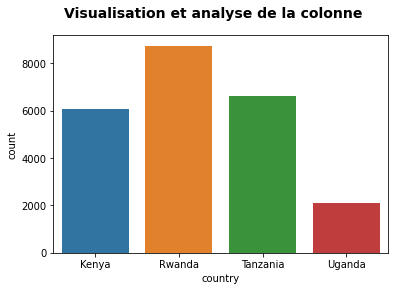

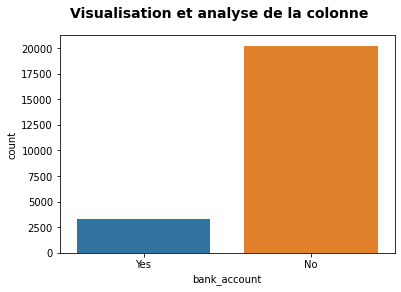

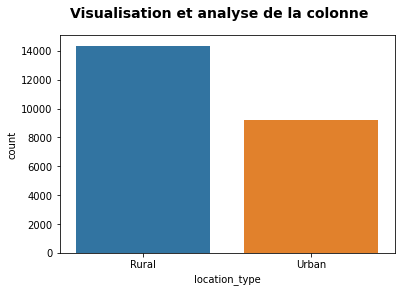

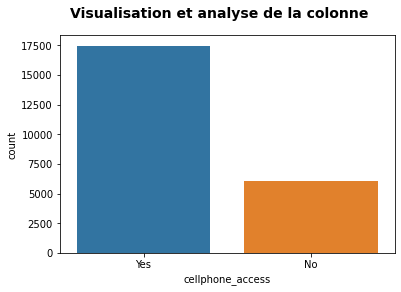

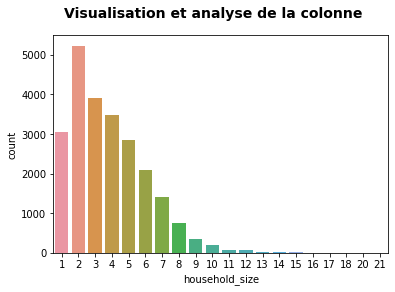

In [21]:
viz(df)

In [22]:
columns = ['relationship_with_head', 'marital_status',  'education_level',  'job_type']
def viz1(df):
    for col in df[columns]:   
        
        fig = plt.figure(figsize=(16, 6))
        fig.suptitle('Visualisation et analyse de la colonne ', fontsize=14, fontweight='bold')
        sns.countplot(df[col])
        plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

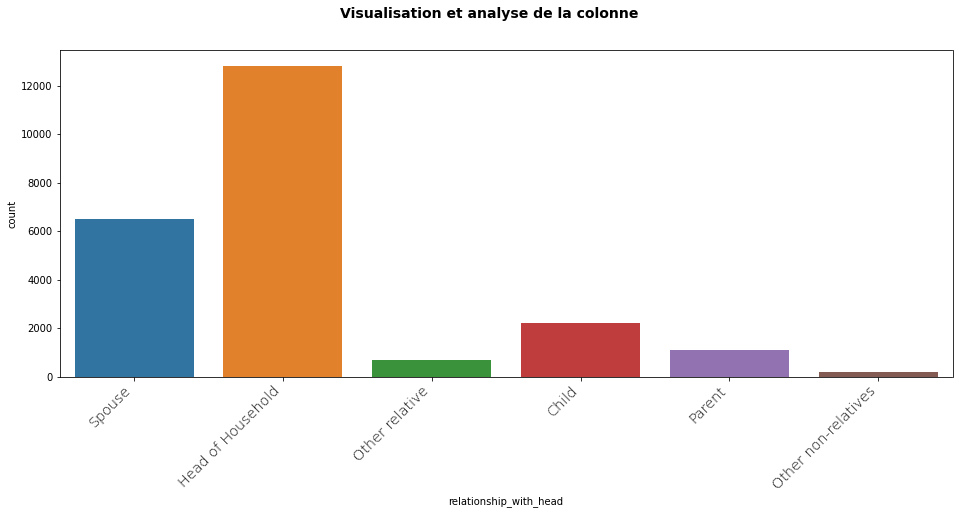

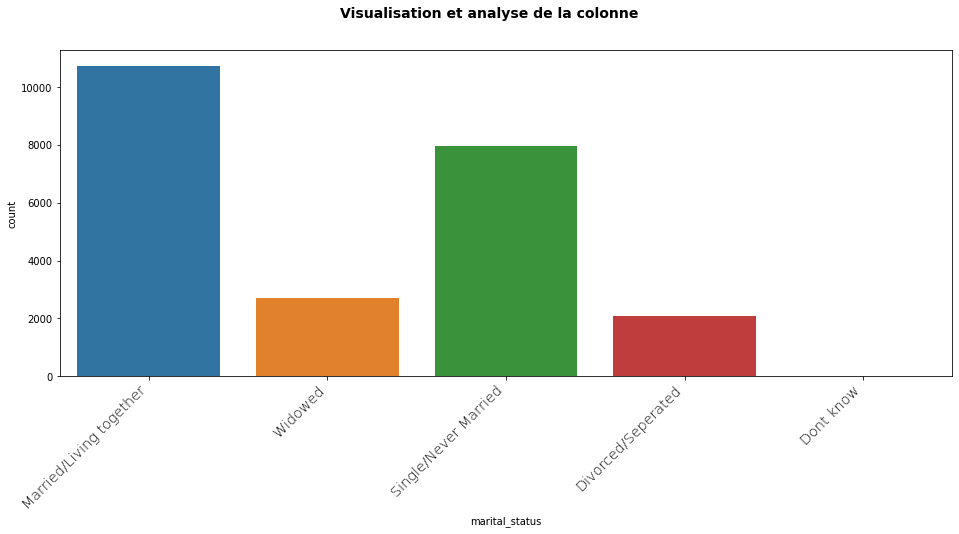

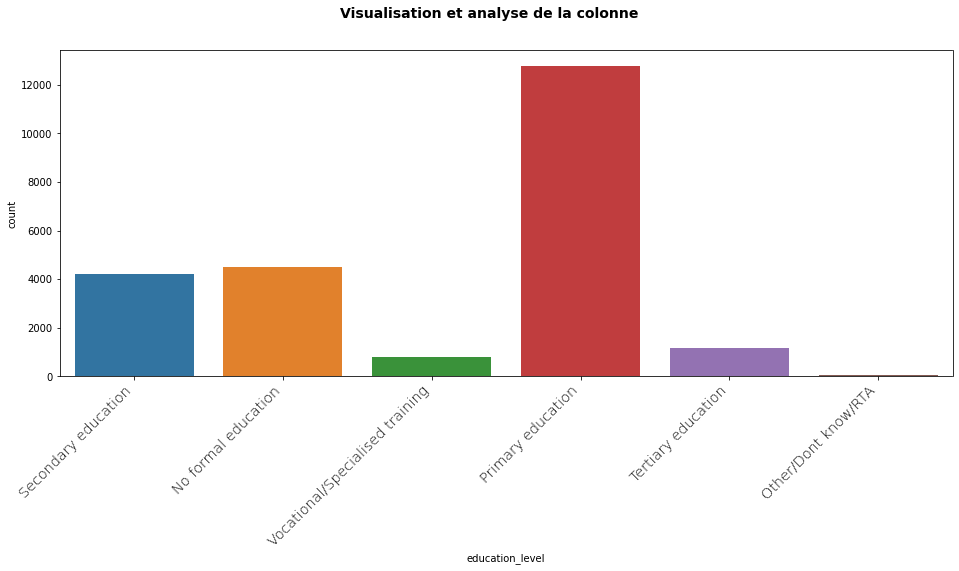

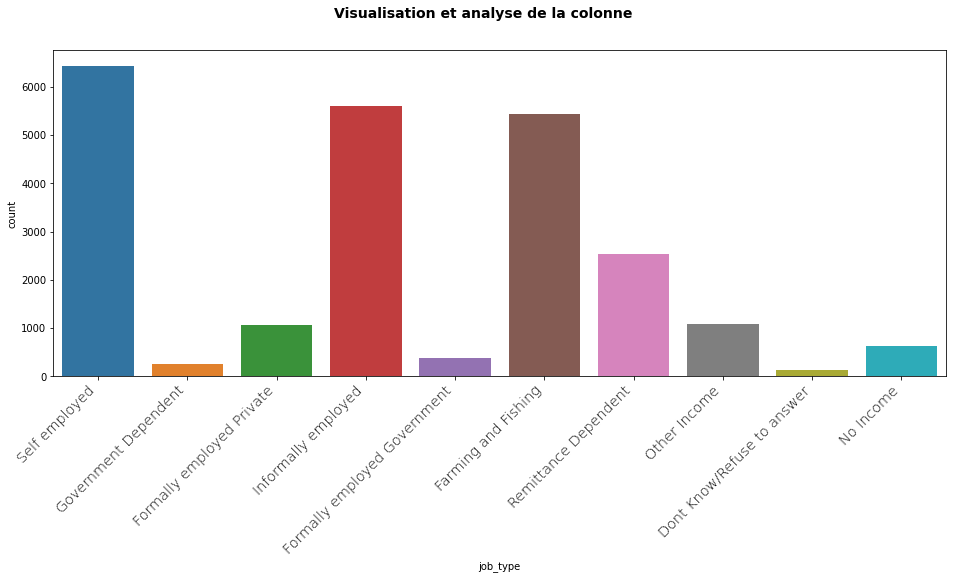

In [23]:
viz1(df)

In [24]:
'relationship_with_head', 'marital_status',  'education_level',  'job_type'

('relationship_with_head', 'marital_status', 'education_level', 'job_type')

Text(0.5, 1.0, 'Education level Distribution')

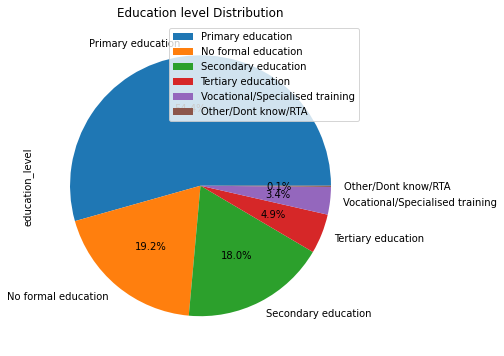

In [25]:
plot = df.education_level.value_counts().plot(kind = "pie", figsize = (6,6), autopct = '%1.1f%%', legend=True)
plot.set_title("Education level Distribution")

# - [II - Analyses Bivariées](#I)

<AxesSubplot:xlabel='country', ylabel='count'>

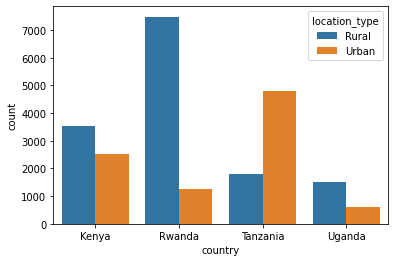

In [26]:
sns.countplot('country', hue= 'location_type', data=df)

<AxesSubplot:xlabel='country', ylabel='count'>

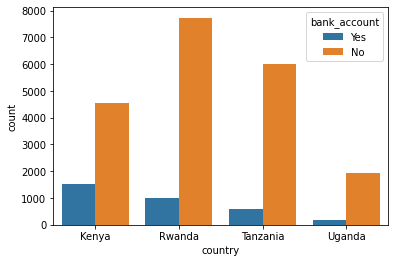

In [27]:
sns.countplot('country', hue= 'bank_account', data=df)

<AxesSubplot:xlabel='cellphone_access', ylabel='count'>

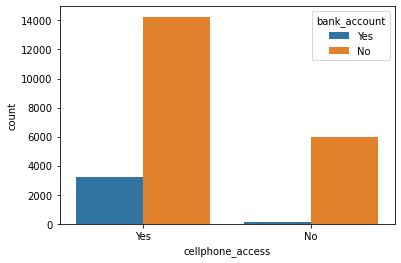

In [28]:
sns.countplot('cellphone_access', hue= 'bank_account', data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16'),
  Text(16, 0, '17'),
  Text(17, 0, '18'),
  Text(18, 0, '20'),
  Text(19, 0, '21')])

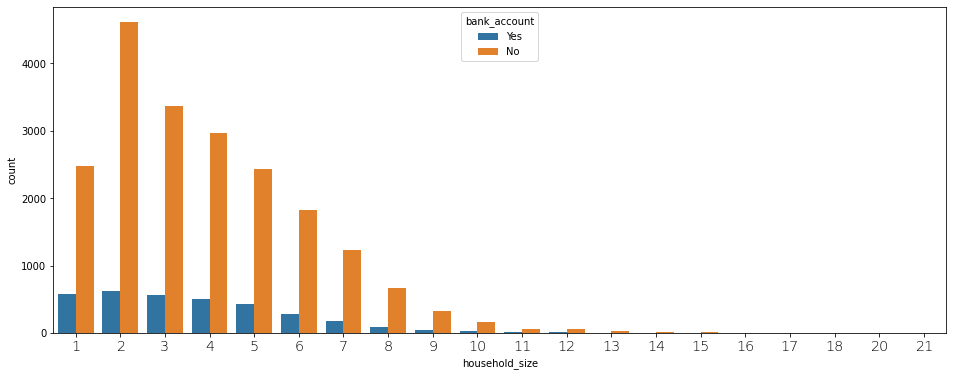

In [29]:
plt.figure(figsize=(16, 6))
sns.countplot('household_size', hue= 'bank_account', data=df)
plt.xticks(fontweight='light', fontsize='x-large')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

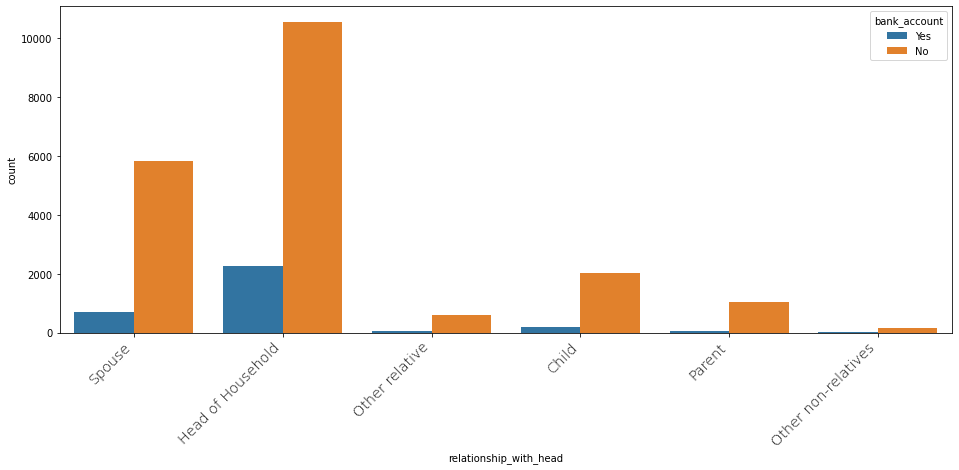

In [30]:
plt.figure(figsize=(16, 6))
sns.countplot('relationship_with_head', hue= 'bank_account', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

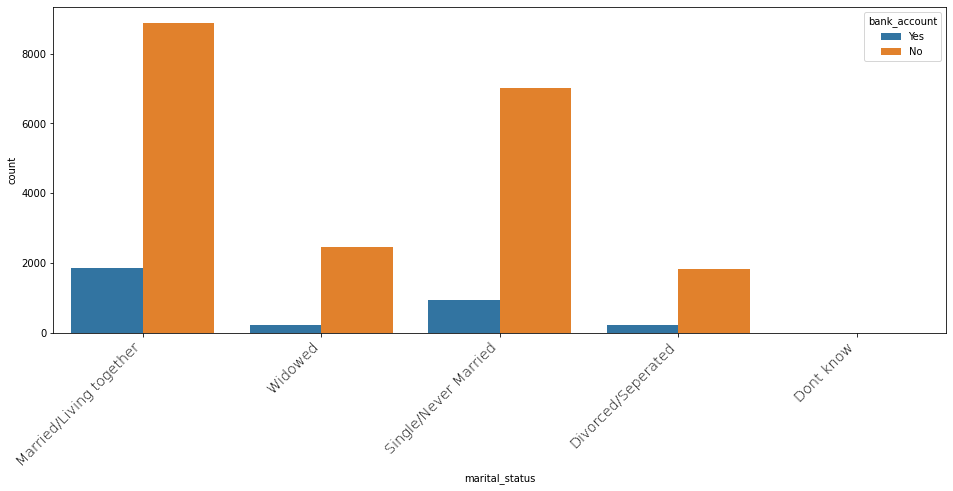

In [31]:
plt.figure(figsize=(16, 6))
sns.countplot('marital_status', hue= 'bank_account', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Secondary education'),
  Text(1, 0, 'No formal education'),
  Text(2, 0, 'Vocational/Specialised training'),
  Text(3, 0, 'Primary education'),
  Text(4, 0, 'Tertiary education'),
  Text(5, 0, 'Other/Dont know/RTA')])

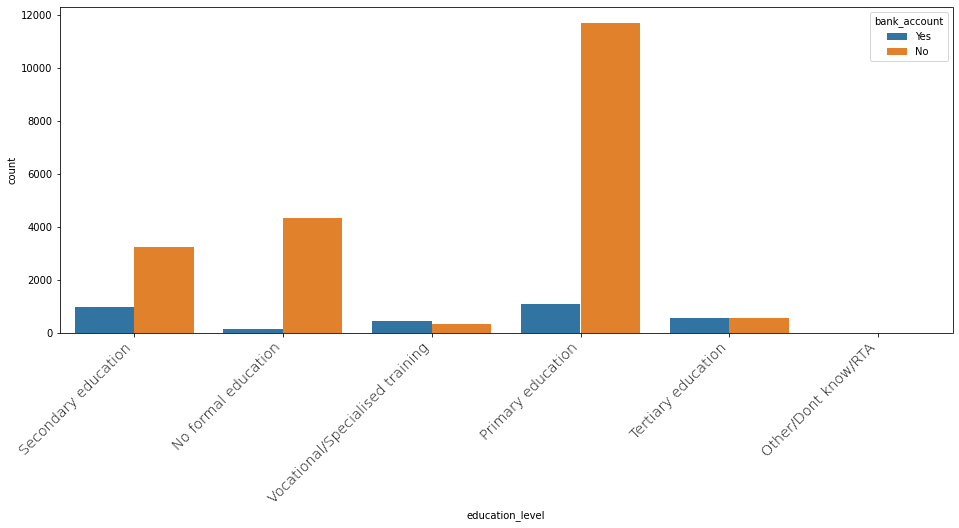

In [32]:
plt.figure(figsize=(16, 6))
sns.countplot('education_level', hue= 'bank_account', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

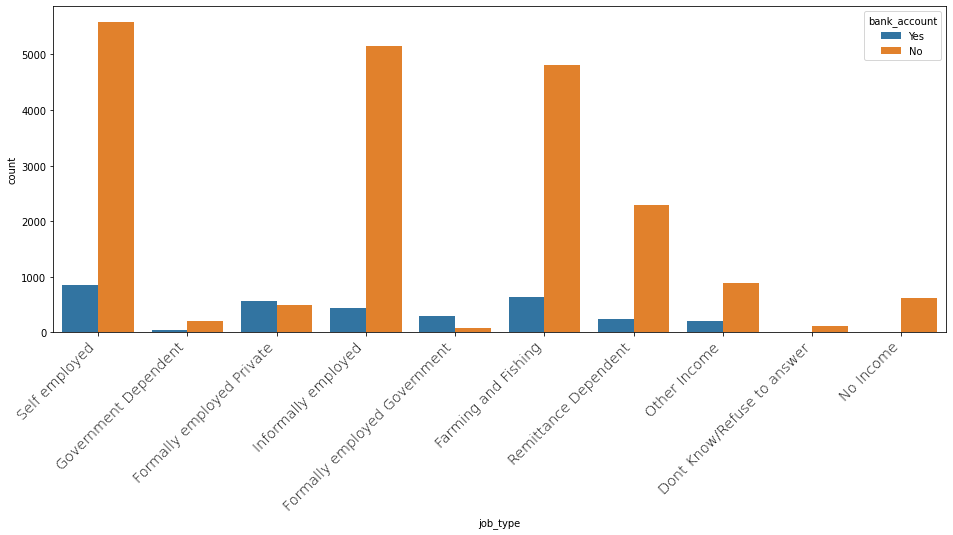

In [33]:
plt.figure(figsize=(16, 6))
sns.countplot('job_type', hue= 'bank_account', data=df)
plt.xticks(rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

In [34]:
print(df['country'].value_counts())

print(df['country'].unique())

Rwanda      8735
Tanzania    6620
Kenya       6068
Uganda      2101
Name: country, dtype: int64
['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


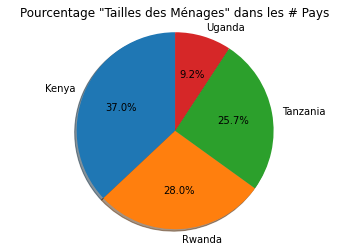

In [35]:
# Distribution of household sizes
country = ['Kenya', 'Rwanda', 'Tanzania', 'Uganda']
household = [8735, 6620, 6068, 2180]
explode = [0.1, 0, 0]
# 
plt.pie(household, labels=country, autopct = '%1.1f%%',  shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pourcentage "Tailles des Ménages" dans les # Pays')
plt.show()

<AxesSubplot:>

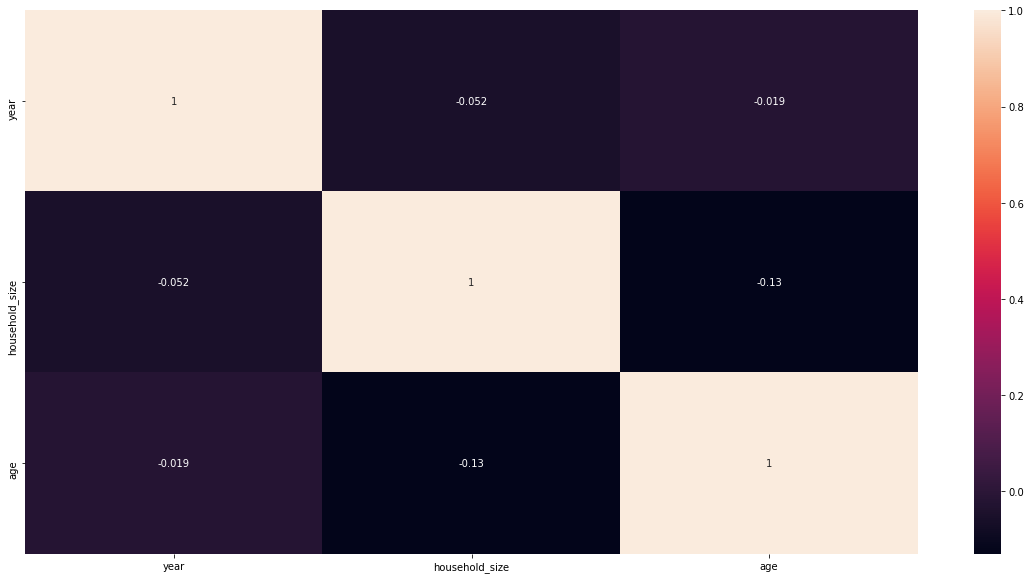

In [36]:
# Création d'une corrélation entre les différents features
plt.figure(figsize=(20,10))
sns.heatmap (df.corr(), annot = True)

In [37]:
brands= df['age'].value_counts().head(10).to_frame()
k = brands.style.background_gradient(cmap='Reds')
k

,age
30,1056
35,836
25,792
28,748
32,715
40,685
20,626
26,615
23,588
18,585


# Pré-traitement des données


In [38]:
df['bank_account'] = df['bank_account'].astype('category').cat.codes

In [39]:
# On renomme la colonne 'bank_account' en 'target'
df['target'] = df['bank_account']

In [40]:
# supprime "uniqueid" label
df = df.drop(['uniqueid','bank_account'] , axis = 1)

In [41]:
#Data Preprocessing
# transform boolean value [Tes, No] to binary value [0, 1]
from sklearn.preprocessing import LabelEncoder
df_encod = df.apply(LabelEncoder().fit_transform)
df_encod

,country,year,location_type,cellphone_access,household_size,age,gender,relationship_with_head,marital_status,education_level,job_type,target
0,0,2,0,1,2,8,0,5,2,3,9,1
1,0,2,0,0,4,54,0,1,4,0,4,0
2,0,2,1,1,4,10,1,3,3,5,9,1
3,0,2,0,1,4,18,0,1,2,2,3,0
4,0,2,1,0,7,10,1,0,3,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,0,1,3,32,0,1,0,0,7,0
23520,3,2,0,1,1,11,0,1,3,3,7,0
23521,3,2,0,1,4,11,0,4,4,2,7,0
23522,3,2,1,1,6,14,0,4,0,3,9,0


In [42]:
df_encod

,country,year,location_type,cellphone_access,household_size,age,gender,relationship_with_head,marital_status,education_level,job_type,target
0,0,2,0,1,2,8,0,5,2,3,9,1
1,0,2,0,0,4,54,0,1,4,0,4,0
2,0,2,1,1,4,10,1,3,3,5,9,1
3,0,2,0,1,4,18,0,1,2,2,3,0
4,0,2,1,0,7,10,1,0,3,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,0,1,3,32,0,1,0,0,7,0
23520,3,2,0,1,1,11,0,1,3,3,7,0
23521,3,2,0,1,4,11,0,4,4,2,7,0
23522,3,2,1,1,6,14,0,4,0,3,9,0


In [43]:
df_encod

,country,year,location_type,cellphone_access,household_size,age,gender,relationship_with_head,marital_status,education_level,job_type,target
0,0,2,0,1,2,8,0,5,2,3,9,1
1,0,2,0,0,4,54,0,1,4,0,4,0
2,0,2,1,1,4,10,1,3,3,5,9,1
3,0,2,0,1,4,18,0,1,2,2,3,0
4,0,2,1,0,7,10,1,0,3,2,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,0,1,3,32,0,1,0,0,7,0
23520,3,2,0,1,1,11,0,1,3,3,7,0
23521,3,2,0,1,4,11,0,4,4,2,7,0
23522,3,2,1,1,6,14,0,4,0,3,9,0


In [44]:
X = df_encod.iloc[:, 0: -1]
y = df_encod.iloc[:, -1]

In [45]:
y.shape, X.shape

((23524,), (23524, 11))

In [46]:
# standardiser the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_stand = scaler.fit_transform(X)

# <center>Etude Machine Learning </center>

In [47]:
#Importation des différentes librairies
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report  

In [48]:
 #Prepare an array with all the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [49]:
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [50]:
print(X_train.shape)
print(X_test.shape)

(18819, 11)
(4705, 11)


In [51]:
X

,country,year,location_type,cellphone_access,household_size,age,gender,relationship_with_head,marital_status,education_level,job_type
0,0,2,0,1,2,8,0,5,2,3,9
1,0,2,0,0,4,54,0,1,4,0,4
2,0,2,1,1,4,10,1,3,3,5,9
3,0,2,0,1,4,18,0,1,2,2,3
4,0,2,1,0,7,10,1,0,3,2,5
...,...,...,...,...,...,...,...,...,...,...,...
23519,3,2,0,1,3,32,0,1,0,0,7
23520,3,2,0,1,1,11,0,1,3,3,7
23521,3,2,0,1,4,11,0,4,4,2,7
23522,3,2,1,1,6,14,0,4,0,3,9


In [52]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

C:\Users\utilisateur\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


  Name     Score
0   LR  0.871413
1  XGB  0.878215
2   RF  0.865462
3   DT  0.834006


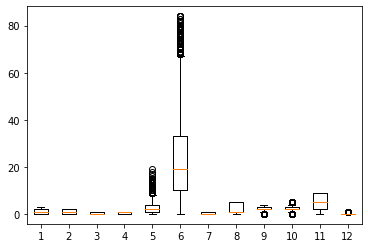

In [53]:
# Diagrammes boîte des composantes principales
plt.figure()
plt.boxplot(df_encod)
plt.show()

#### <center>--- Rééquilibrage du jeu de données par sur-échantillonnage : Oversampling (Smote) ---</center>

In [54]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.metrics import classification_report_imbalanced
# Rééquilibrage par Oversampling
sm = SMOTE(random_state=42)
X_test, y_test = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_test))

Resampled dataset shape Counter({0: 16207, 1: 16207})


                   pre       rec       spe        f1       geo       iba       sup

          0       0.73      1.00      0.62      0.84      0.79      0.65      8090
          1       1.00      0.62      1.00      0.77      0.79      0.60      8117

avg / total       0.86      0.81      0.81      0.80      0.79      0.62     16207



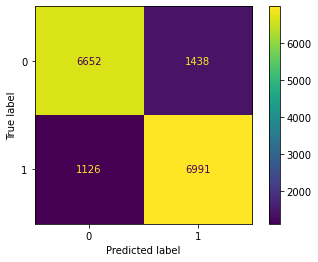

In [55]:
from imblearn.metrics import classification_report_imbalanced
from xgboost import XGBClassifier
import xgboost as xgb
# Création du model
xgb = XGBClassifier()
# Préparer les données d'entrainement et test
X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state = 0)
# Appliquer le modèle
xgb.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Vérifier la précision méthod 2
print(classification_report_imbalanced(y_test, y_pred))
# Matrice de correlation
plot_confusion_matrix(xgb, X_test, y_test)
plt.show()

In [ ]:
importances = xgb.feature_importances_
indices = np.argsort(importances)[::-1]
plt.title('Feature Importances')

plt.bar(range(X_train.shape[1]), 
        importances[indices],
        color='lightblue', 
        align='center')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score as score

rfc = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
rfc.fit(X_test, y_test)
pred = rfc.predict(X_test)
# Vérifier tuus les metrics
print(classification_report(y_test, y_pred))
# Matrice de correlation
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()


In [ ]:
print (df.columns)

In [ ]:

def data_target(df_encod, dict_result, models):
    
    counter = 0

    for i in models:
        
        X = df_encod.iloc[:, 0: -1]
        y = df_encod.iloc[:, -1]

        #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
        #  Oversampling (Smote) 
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

        
        i.fit(X_train, y_train)
        y_pred = i.predict(X_test)

        y[y == 1]
        y[y == 0]
        
        print ("\n\n", '≡'*18, "Etude Compte Bancaire avec model : ",i, '≡'*18, "\n")
        report = classification_report(y_test, y_pred)
        print(report)

        dict_result.update({counter : report})
        
        
    
        feature_imp = pd.Series(i.feature_importances_,index=X.columns).sort_values(ascending=False)
        print(feature_imp)

        sns.barplot(x=feature_imp, y=feature_imp.index)
        plt.xlabel('Feature Importance Score')
        plt.ylabel('Features')
        plt.title("Visualizing Important Features")
        plt.legend()
        plt.show()
              
        plot_confusion_matrix(i, X_test, y_test)
        plt.show()
        
        counter +=1

In [ ]:
from xgboost import plot_tree

models = [ RandomForestClassifier(), DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=5), XGBClassifier()]
dic_resultats = {}
data_target(df_encod, dic_resultats, models)

In [ ]:
list(df.columns)  